<a href="https://colab.research.google.com/github/viniciusbrei/intro_data_science/blob/Code/exercicio_aula_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercício Aula 5


https://github.com/PacktPublishing/Hands-On-Data-Science-for-Marketing/blob/master/Chapter12/python/ABTesting.ipynb

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
!pip install researchpy
import researchpy as rp
import scipy.stats as stats
pd.options.display.float_format = '{:.2f}'.format
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1. Load Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/pthiagu2/DataMining/master/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv', sep=',')

In [4]:
df.shape

(548, 7)

In [5]:
df.head(15)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


# 2. Data Analysis

#### - Total Sales

In [6]:
df['SalesInThousands'].describe()

count   548.00
mean     53.47
std      16.76
min      17.34
25%      42.55
50%      50.20
75%      60.48
max      99.65
Name: SalesInThousands, dtype: float64

Text(0, 0.5, '')

Text(0.5, 1.0, 'sales distribution across different promotions')

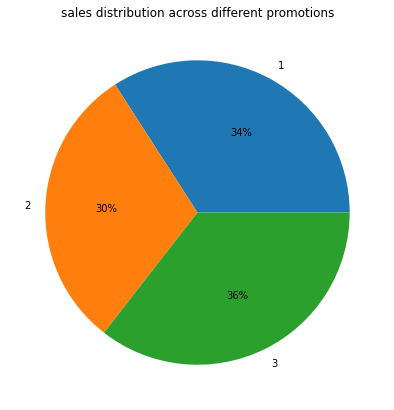

In [7]:
ax = df.groupby(
    'Promotion'
).sum()[
    'SalesInThousands'
].plot.pie(
    figsize=(7, 7),
    autopct='%1.0f%%'
)

ax.set_ylabel('')
ax.set_title('sales distribution across different promotions')

plt.show()

#### - Market Size

In [8]:
df.groupby('MarketSize').count()['MarketID']

MarketSize
Large     168
Medium    320
Small      60
Name: MarketID, dtype: int64

Text(0, 0.5, 'count')

Text(0.5, 1.0, 'breakdowns of market sizes across different promotions')

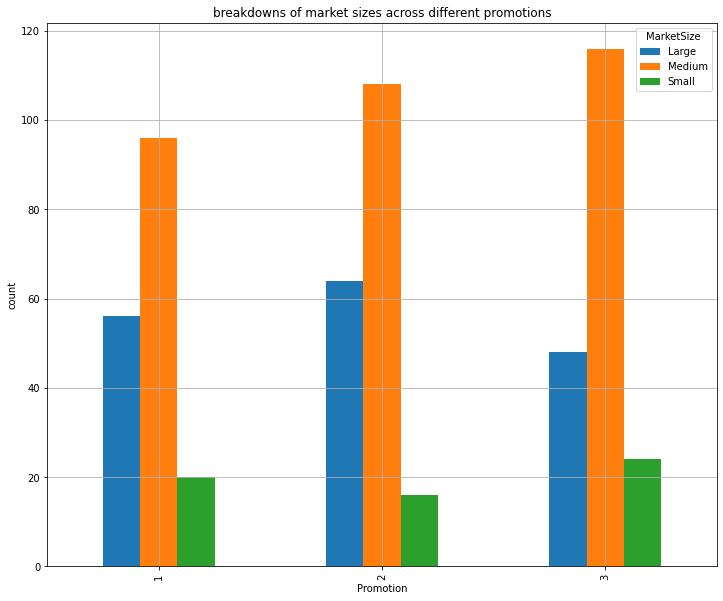

In [9]:
ax = df.groupby([
    'Promotion', 'MarketSize'
]).count()[
    'MarketID'
].unstack(
    'MarketSize'
).plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

Text(0, 0.5, 'Sales (in Thousands)')

Text(0.5, 1.0, 'breakdowns of market sizes across different promotions')

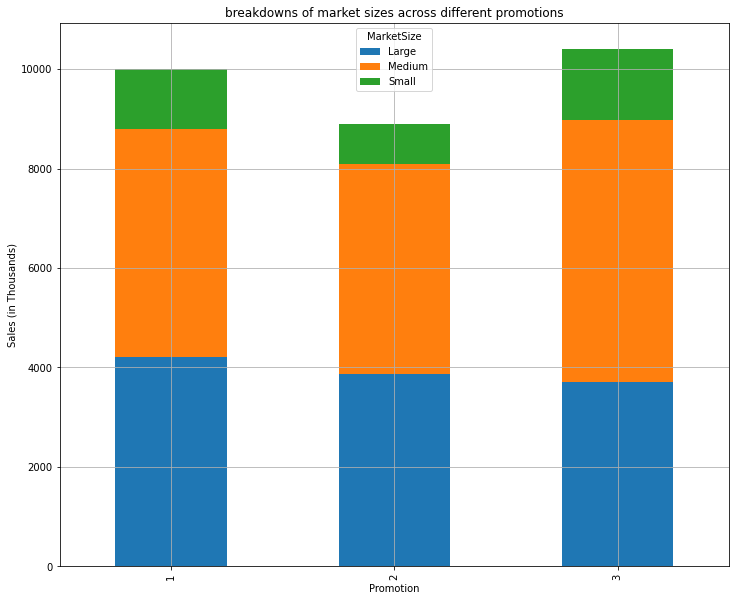

In [10]:
ax = df.groupby([
    'Promotion', 'MarketSize'
]).sum()[
    'SalesInThousands'
].unstack(
    'MarketSize'
).plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
    stacked=True
)

ax.set_ylabel('Sales (in Thousands)')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

#### - Store Age

In [11]:
df['AgeOfStore'].describe()

count   548.00
mean      8.50
std       6.64
min       1.00
25%       4.00
50%       7.00
75%      12.00
max      28.00
Name: AgeOfStore, dtype: float64

Text(0.5, 0, 'age')

Text(0, 0.5, 'count')

Text(0.5, 1.0, 'overall distributions of age of store')

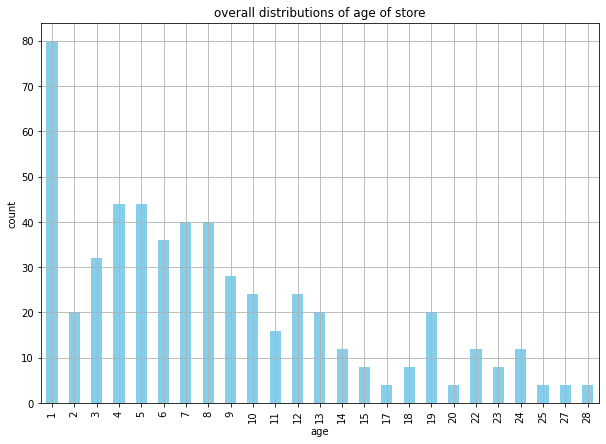

In [12]:
ax = df.groupby(
    'AgeOfStore'
).count()[
    'MarketID'
].plot(
    kind='bar', 
    color='skyblue',
    figsize=(10,7),
    grid=True
)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

Text(0, 0.5, 'age')

Text(0.5, 0, 'count')

Text(0.5, 1.0, 'overall distributions of age of store')

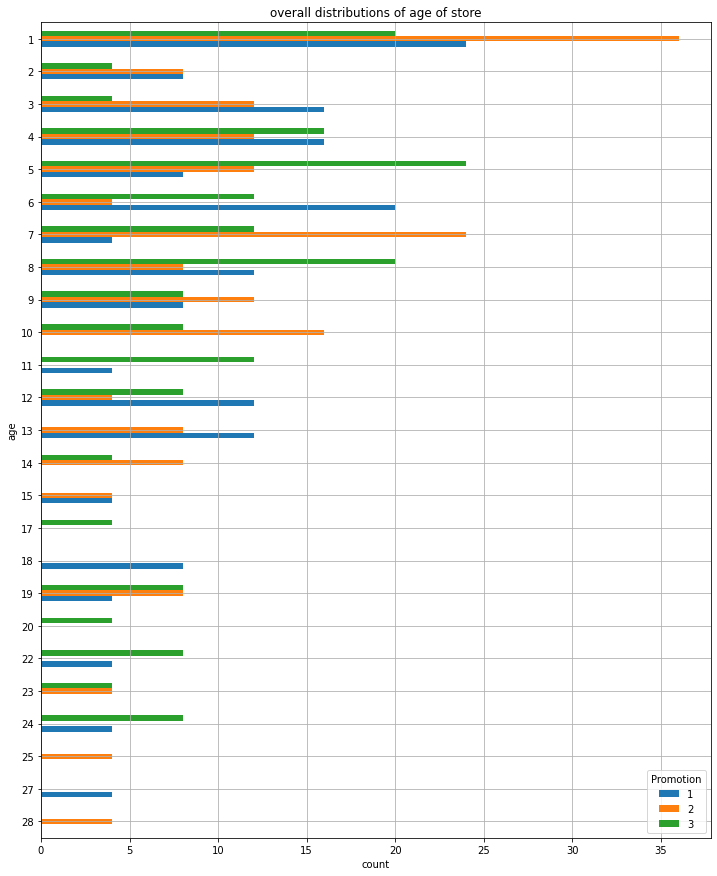

In [13]:
ax = df.groupby(
    ['AgeOfStore', 'Promotion']
).count()[
    'MarketID'
].unstack(
    'Promotion'
).iloc[::-1].plot(
    kind='barh', 
    figsize=(12,15),
    grid=True
)

ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

In [14]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.00,8.28,6.64,1.00,3.00,6.00,12.00,27.00
2,188.00,7.98,6.60,1.00,3.00,7.00,10.00,28.00
3,188.00,9.23,6.65,1.00,5.00,8.00,12.00,24.00


#### - Week Number

In [15]:
df.groupby('week').count()['MarketID']

week
1    137
2    137
3    137
4    137
Name: MarketID, dtype: int64

In [16]:
df.groupby(['Promotion', 'week']).count()['MarketID']

Promotion  week
1          1       43
           2       43
           3       43
           4       43
2          1       47
           2       47
           3       47
           4       47
3          1       47
           2       47
           3       47
           4       47
Name: MarketID, dtype: int64

Text(0, 0.5, 'Promotion #1')

Text(0, 0.5, 'Promotion #2')

Text(0, 0.5, 'Promotion #3')

Text(0.5, 0, 'distribution across different weeks')

Text(0.5, 0, 'distribution across different weeks')

Text(0.5, 0, 'distribution across different weeks')

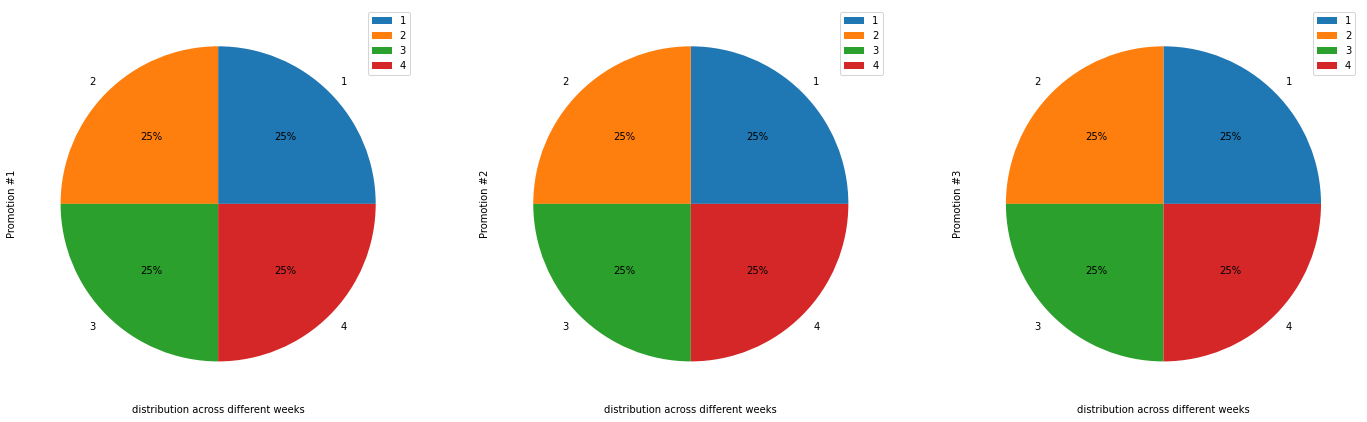

In [17]:
ax1, ax2, ax3 = df.groupby(
    ['week', 'Promotion']
).count()[
    'MarketID'
].unstack('Promotion').plot.pie(
    subplots=True,
    figsize=(24, 8),
    autopct='%1.0f%%'
)

ax1.set_ylabel('Promotion #1')
ax2.set_ylabel('Promotion #2')
ax3.set_ylabel('Promotion #3')

ax1.set_xlabel('distribution across different weeks')
ax2.set_xlabel('distribution across different weeks')
ax3.set_xlabel('distribution across different weeks')

plt.show()

# 3. Statistical Significance

In [18]:
import numpy as np
from scipy import stats

#### - t-test

In [19]:
means = df.groupby('Promotion').mean()['SalesInThousands']
means

Promotion
1   58.10
2   47.33
3   55.36
Name: SalesInThousands, dtype: float64

In [20]:
stds = df.groupby('Promotion').std()['SalesInThousands']
stds

Promotion
1   16.55
2   15.11
3   16.77
Name: SalesInThousands, dtype: float64

In [21]:
ns = df.groupby('Promotion').count()['SalesInThousands']
ns

Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64

#### - Promotion 1 vs. 2

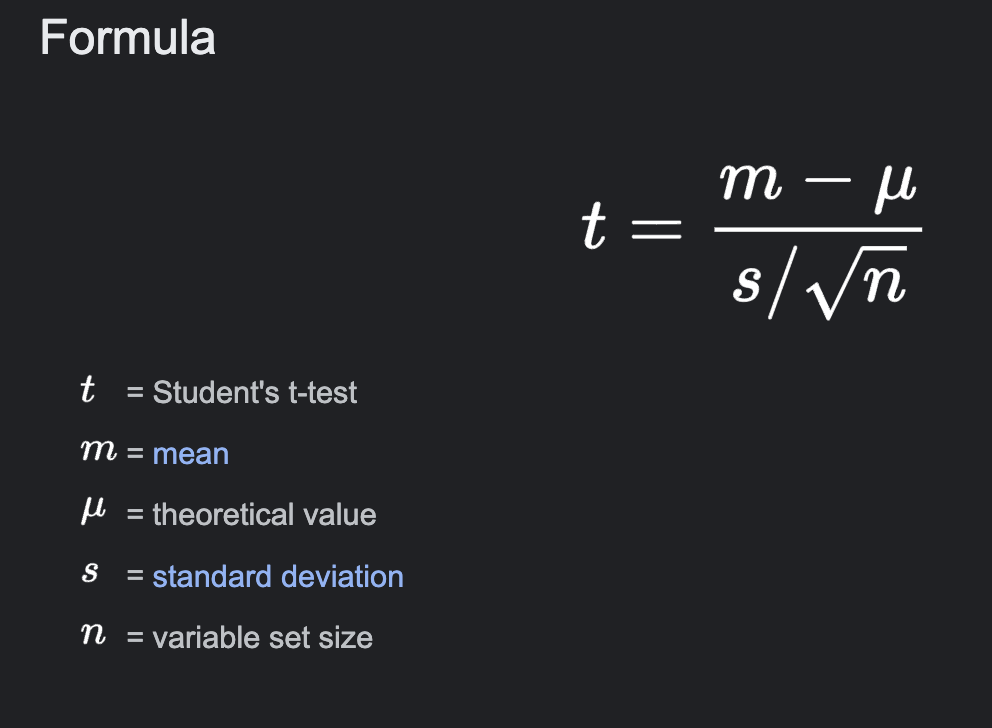

#### Promotion 1 vs 2

In [22]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
    equal_var=False
)

In [23]:
f'{t:.3f}'

'6.428'

In [24]:
f'{p:.10f}'

'0.0000000004'

#### Promotion 1 vs. 3

In [25]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False
)

In [26]:
f'{t:.3f}'

'1.556'

In [27]:
f'{p:.2f}'

'0.12'